<a href="https://colab.research.google.com/github/rahathasan452/tnymlPrctc/blob/main/Copy_of_04_images_multi_class_classification_fruits_kaggle_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classification
Simple example to classify images using tensorflow

## Import Data

In [ ]:
# Import data from google drive
!gdown 1cU3I3fPIIX23sl16KaXf7BJ7Dm1V9Ijg

# Original here https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images

Downloading...
From: https://drive.google.com/uc?id=1cU3I3fPIIX23sl16KaXf7BJ7Dm1V9Ijg
To: /content/images_fruits_classification.zip
100% 214M/214M [00:01<00:00, 177MB/s]


In [ ]:
# Unzip it
import zipfile

zip_ref = zipfile.ZipFile("images_fruits_classification.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="images/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder strawberry fruit. Train data copied. 28 files
Folder strawberry fruit. Test data copied. 8 files
Folder strawberry fruit. Validation data copied. 4 files
Folder orange fruit. Train data copied. 28 files
Folder orange fruit. Test data copied. 8 files
Folder orange fruit. Validation data copied. 4 files
Folder mango fruit. Train data copied. 28 files
Folder mango fruit. Test data copied. 8 files
Folder mango fruit. Validation data copied. 4 files
Folder grapes fruit. Train data copied. 28 files
Folder grapes fruit. Test data copied. 8 files
Folder grapes fruit. Validation data copied. 4 files
Folder apple fruit. Train data copied. 28 files
Folder apple fruit. Test data copied. 8 files
Folder apple fruit. Validation data copied. 4 files
Folder kiwi fruit. Train data copied. 28 files
Folder kiwi fruit. Test data copied. 8 files
Folder kiwi fruit. Validation data copied. 4 files
Folder chickoo fruit. Train data copied. 28 files
Folder chickoo fruit. Test data copied. 8 files
Folder c

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "images/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

## Explore and visualize the data

In [ ]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit',
       'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit',
       'strawberry fruit'], dtype='<U16')

In [ ]:
len(class_names)

9

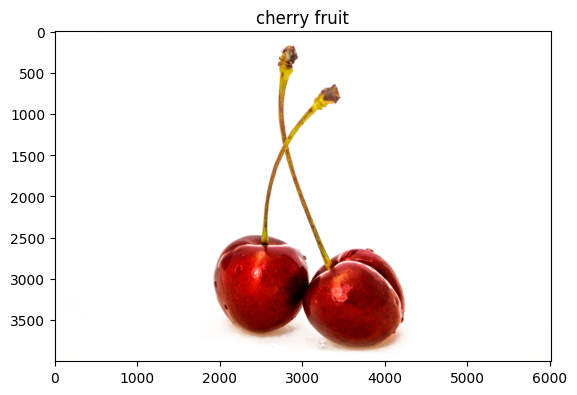

In [ ]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "cherry fruit")

## Create datasets from directories

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 251 images belonging to 9 classes.
Found 72 images belonging to 9 classes.
Found 36 images belonging to 9 classes.


## Create and fit the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(9, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/3
8/8 [==============================] - 28s 3s/step - loss: 3.0288 - accuracy: 0.0916 - val_loss: 2.4761 - val_accuracy: 0.1111
Epoch 2/3
8/8 [==============================] - 25s 3s/step - loss: 2.1539 - accuracy: 0.2311 - val_loss: 2.0218 - val_accuracy: 0.4167
Epoch 3/3
8/8 [==============================] - 27s 3s/step - loss: 1.8587 - accuracy: 0.3546 - val_loss: 1.8379 - val_accuracy: 0.2778


## Evaluate model

In [ ]:
model.evaluate(test_data)

3/3 [==============================] - 6s 1s/step - loss: 1.8782 - accuracy: 0.2778


[1.8782240152359009, 0.2777777910232544]

<Axes: >

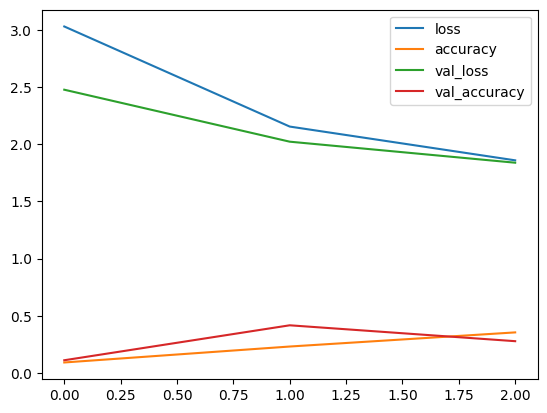

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

## Make a prediction

In [ ]:
# Download image
!wget https://images.healthshots.com/healthshots/en/uploads/2022/01/21143156/BANANAS-1600x900.jpg

def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("BANANAS-1600x900.jpg", 240)

--2023-05-31 05:50:03--  https://images.healthshots.com/healthshots/en/uploads/2022/01/21143156/BANANAS-1600x900.jpg
Resolving images.healthshots.com (images.healthshots.com)... 23.7.213.254, 2600:1417:7800:69a::18a5, 2600:1417:7800:681::18a5
Connecting to images.healthshots.com (images.healthshots.com)|23.7.213.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘BANANAS-1600x900.jpg’

BANANAS-1600x900.jp     [ <=>                ] 181.38K  --.-KB/s    in 0.05s   

2023-05-31 05:50:04 (3.87 MB/s) - ‘BANANAS-1600x900.jpg’ saved [185737]



In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0_)
pred

1/1 [==============================] - 0s 89ms/step


array([[0.08891838, 0.07685789, 0.13675104, 0.09869669, 0.22569305,
        0.11340041, 0.07459857, 0.08669336, 0.09839052]], dtype=float32)

In [ ]:
class_names[pred[0].argmax()]

'grapes fruit'